# 1. Get cleaning example data

In [1]:
import os, json
import pandas as pd
import numpy as np

In [2]:
# Dimensionality Reduction : T-SNE algorithm 
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 2. Feature And Model

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from collections import Counter

In [4]:
from load_data import load_data
data1_path = "./actor_words.csv"
data2_path = "./actors_70s.csv"
df_1000p = load_data(data1_path, data2_path)
df_1000p.head()

,actor_id,actor_name,words
0,nm0005211,Danica McKellar,danica mckellarmckellar 2018u. . nation book f...
1,nm0005576,Drea de Matteo,drea de matteod matteo 2005bornandrea donna de...
2,nm0028846,Shawn Andrews,"american footbal guard tackl actor , see shawn..."
3,nm0036571,Monica,"look monica monica wiktionari , free dictionar..."
4,nm0038875,John Asher,thi biographi live person need addit citat ver...


In [5]:
df_1000p.shape

(1000, 3)

In [7]:
# Limit the max_features 
vectorizer = TfidfVectorizer(max_features=1000)
X_8 = vectorizer.fit_transform(df_1000p['words'])
features = vectorizer.get_feature_names()

# clusters = default 8
kmeans_n8 = KMeans()
kmeans_n8.fit(X_8)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
top_centroids = kmeans_n8.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(top_centroids):
    print("%d: %s" % (num, ", ".join(features[i] for i in centroid)))

0: 1971, 48, actor, 47, he, american, film, role, seri, presentspous
1: wa, team, hi, he, state, career, american, first, all, championship
2: 1972, 1978, actress, 1976, american, seri, known, role, born, actor
3: refer, may, jame, john, david, jone, scott, michael, daniel, chri
4: sourc, remov, thi, live, person, learn, templat, messag, pleas, help
5: 1973, 1979, 1974, 1981, 1980, seri, actress, role, film, actor
6: film, award, actress, role, seri, star, drama, nomin, comedi, in
7: album, releas, record, singl, singer, music, billboard, songwrit, hi, studio


In [11]:
print("random sample of name_id in each cluster")
assigned_cluster = kmeans_n8.transform(X_8).argmin(axis=1)
# print(kmeans.n_clusters.n_clusters) defualt = 8

for i in range(kmeans_n8.n_clusters):
    cluster = np.arange(0, X_8.shape[0])[assigned_cluster==i]
    sample_name_id = np.random.choice(cluster, 5, replace=False)
    print("cluster %d:" % i)
    for name_id in sample_name_id:
        actor_name_id = df_1000p.loc[name_id]['actor_id']
        name = df_1000p.loc[name_id]['actor_name']

        print( "       {}, {}. ".format(actor_name_id, name) )

random sample of name_id in each cluster
cluster 0:
       nm0733812, Kali Rocha. 
       nm0711110, Jim Rash. 
       nm0319698, Jessalyn Gilsig. 
       nm0719637, Jeremy Renner. 
       nm0707476, Mary Lynn Rajskub. 
cluster 1:
       nm2737380, Michael Ienna. 
       nm1293381, Sunny Leone. 
       nm4062704, Samuel Morgan. 
       nm3090621, Santino Ramos. 
       nm1862367, Dwyane Wade. 
cluster 2:
       nm1328703, Mathew Horne. 
       nm0423414, Maz Jobrani. 
       nm1390614, Jennette McCurdy. 
       nm0665235, Elsa Pataky. 
       nm0000192, Alyssa Milano. 
cluster 3:
       nm2410356, Brian Robinson. 
       nm1117031, Sasha. 
       nm1358661, Andrew Stone. 
       nm0369895, Havoc. 
       nm0036571, Monica. 
cluster 4:
       nm1248373, Gina Holden. 
       nm1249574, Phellipe Haagensen. 
       nm1513748, Sophia Santi. 
       nm0010169, Carlos Acosta. 
       nm1377001, Chris Carmack. 
cluster 5:
       nm0546640, Bam Margera. 
       nm1325899, Travis Knight. 
      

In [12]:
tfidf_weight = X_8.toarray()
tfidf_weight, tfidf_weight.shape

(array([[0.        , 0.08494602, 0.        , ..., 0.10388203, 0.        ,
         0.        ],
        [0.        , 0.08135474, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.1787987 , 0.        ,
         0.        ],
        [0.        , 0.        , 0.17998325, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]), (1000, 1000))

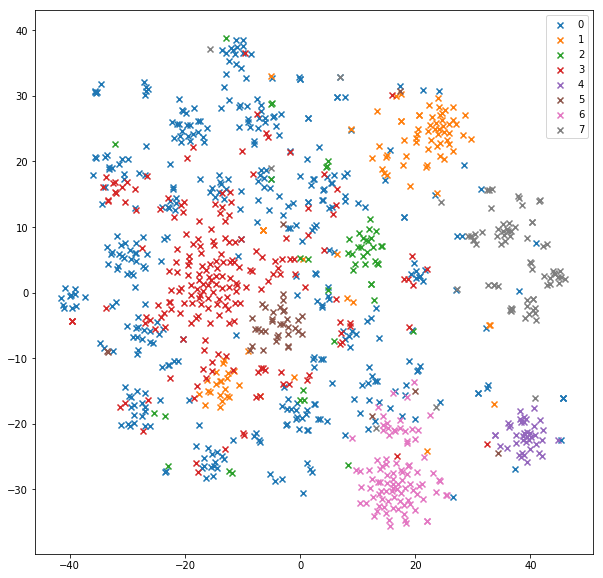

In [13]:
# Dimensionality Reduction : T-SNE algorithm 
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2)
decomposition_data = tsne.fit_transform(tfidf_weight)

fig = plt.figure(figsize=(10, 10))

for color in range(0,8):
    label = []
    x = []
    y = []
    
    for i in range(len(kmeans.labels_)):
        if kmeans.labels_[i] == color:
            x.append(decomposition_data[i][0])
            y.append(decomposition_data[i][1])

    plt.scatter(x, y, label=color, marker="x")

# plt.xticks(())
# plt.yticks(())
plt.legend()
plt.savefig('./kmeans_1000features_8clusters.png', aspect=1)



In [14]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [15]:
def within_cluster_sum_of_squares(X, y, cluster):
    cluster_mean = X[y==cluster].mean(axis=0)
    
    return (np.linalg.norm((X[y==cluster] - cluster_mean), axis=1)**2).sum()

In [16]:
def sum_within_cluster_sum_of_squares(X, y):
    tmp = []
    for i in range(max(y)+1):
        tmp.append( within_cluster_sum_of_squares(X,y,i) )
    return sum( tmp )

In [17]:
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df_1000p['words'])
features = vectorizer.get_feature_names()

In [22]:
k = 20 # each clustering include 50 p, sum 1000

wcss = []
silhouette = []
for i in range(k):
    vectorizer = TfidfVectorizer(max_features=1000)
    X = vectorizer.fit_transform(df_1000p['words'])

    y = KMeans(k).fit_predict(X)

    wcss.append( sum_within_cluster_sum_of_squares(X,y) )
    
    if k>1:
        silhouette.append( silhouette_score(X,y) )
    else:
        silhouette.append(0)

In [23]:
print(f'{len(wcss)} wcss :\n  {wcss}')
print('--------')
print(f'{len(silhouette)} silhouette scores :\n  {silhouette}')

20 wcss :
  [761.959599555976, 757.3751897304348, 758.8787186592715, 759.3463327034674, 762.0252413194772, 760.4572002443349, 760.1313913648579, 759.7217345109083, 759.2888024020291, 758.3697731556534, 758.1911764529524, 762.108673545336, 762.0862908925944, 757.9272699257814, 758.683169027932, 760.1096127654469, 762.0846204286497, 760.5675197840235, 760.0796449858623, 758.553687162813]
--------
20 silhouette scores :
  [0.06594388500159855, 0.0672199248107409, 0.06607319319542859, 0.06198969332592848, 0.06498435239417577, 0.06377686099245419, 0.062359134747302036, 0.06706052679315636, 0.06540820106431847, 0.06745115460846401, 0.06824174217310104, 0.06139819558920832, 0.06089541372609433, 0.06768913315264129, 0.0673245249944558, 0.06125209467864119, 0.05968615734042653, 0.06362660156504632, 0.060687583414125945, 0.06720396978854032]


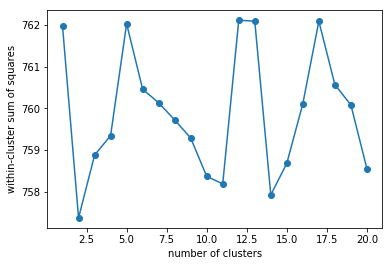

In [24]:
fig, ax = plt.subplots()
ax.plot(range(1,len(wcss)+1), wcss, 'o-')
ax.set_xlabel("number of clusters")
ax.set_ylabel("within-cluster sum of squares")
plt.savefig('./kmeans_wcss.png', aspect=1)

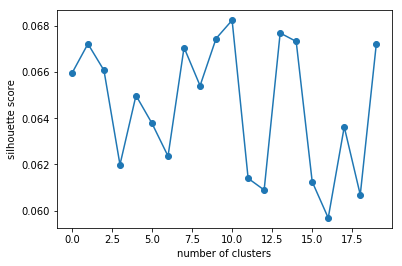

In [25]:
fig, ax = plt.subplots()
ax.plot(range(k), silhouette, 'o-')
ax.set_xlabel("number of clusters")
ax.set_ylabel("silhouette score")
plt.savefig('./kmeans_silhouette.png', aspect=1)

In [26]:
# try num = 6
vectorizer = TfidfVectorizer(max_features=1000)
X_6 = vectorizer.fit_transform(df_1000p['words'])
features = vectorizer.get_feature_names()

kmeans_n6 = KMeans(n_clusters=6)
kmeans_n6.fit(X_6)
top_centroids = kmeans_n6.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(top_centroids):
    print("%d: %s" % (num, ", ".join(features[i] for i in centroid)))

0: team, all, career, championship, wrestl, champion, nba, wwe, nfl, wa
1: refer, may, jame, john, david, jone, scott, michael, daniel, chri
2: actress, american, seri, known, born, role, age, actor, presentspous, model
3: album, hi, singer, wa, releas, music, record, thi, articl, ha
4: film, award, seri, role, actress, star, drama, comedi, actor, nomin
5: sourc, remov, thi, live, person, learn, templat, messag, citat, pleas


In [27]:
# try num = 16
vectorizer = TfidfVectorizer(max_features=1000)
X_16 = vectorizer.fit_transform(df_1000p['words'])
features = vectorizer.get_feature_names()


kmeans_n16 = KMeans(n_clusters=16)
kmeans_n16.fit(X_16)
top_centroids = kmeans_n16.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(top_centroids):
    print("%d: %s" % (num, ", ".join(features[i] for i in centroid)))

0: 1981, 37, seri, 38, actor, film, he, actress, american, 2009
1: 1978, 40, hi, new, actor, 41, american, anchor, televis, film
2: 1979, seri, film, role, actress, 1975, known, american, actor, 1982
3: 1973, 45, film, american, seri, 46, juli, septemb, born, actress
4: refer, may, jame, john, david, jone, scott, michael, daniel, chri
5: 1974, 45, actor, 44, play, seri, 24, march, known, actress
6: wa, hi, team, state, he, all, career, nba, wwe, american
7: sourc, remov, thi, live, person, learn, templat, messag, pleas, help
8: 1984, smith, model, 1989, actress, singer, martial, american, born, film
9: 1976, 42, 43, seri, actor, juli, known, role, american, he
10: 1980, 39, actress, role, seri, film, 38, januari, drama, born
11: 1972, 47, 46, film, actress, american, televis, role, presentspous, actor
12: 1977, 41, 42, actor, actress, role, american, hi, star, film
13: album, releas, record, singl, singer, music, billboard, hi, studio, chart
14: award, film, actress, nomin, drama, seri

In [28]:
print("kmeans n_cluster=6 inertia: {}".format(kmeans_n6.inertia_))
print("kmeans n_cluster=8 inertia: {}".format(kmeans_n8.inertia_))
print("kmeans n_cluster=16 inertia: {}".format(kmeans_n16.inertia_))

kmeans n_cluster=6 inertia: 840.6688673252339
kmeans n_cluster=8 inertia: 827.8035868939182
kmeans n_cluster=16 inertia: 779.3742513482175


In [34]:
# Dimensionality Reduction : T-SNE algorithm 
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2)
decomposition_data = tsne.fit_transform(tfidf_weight_8)

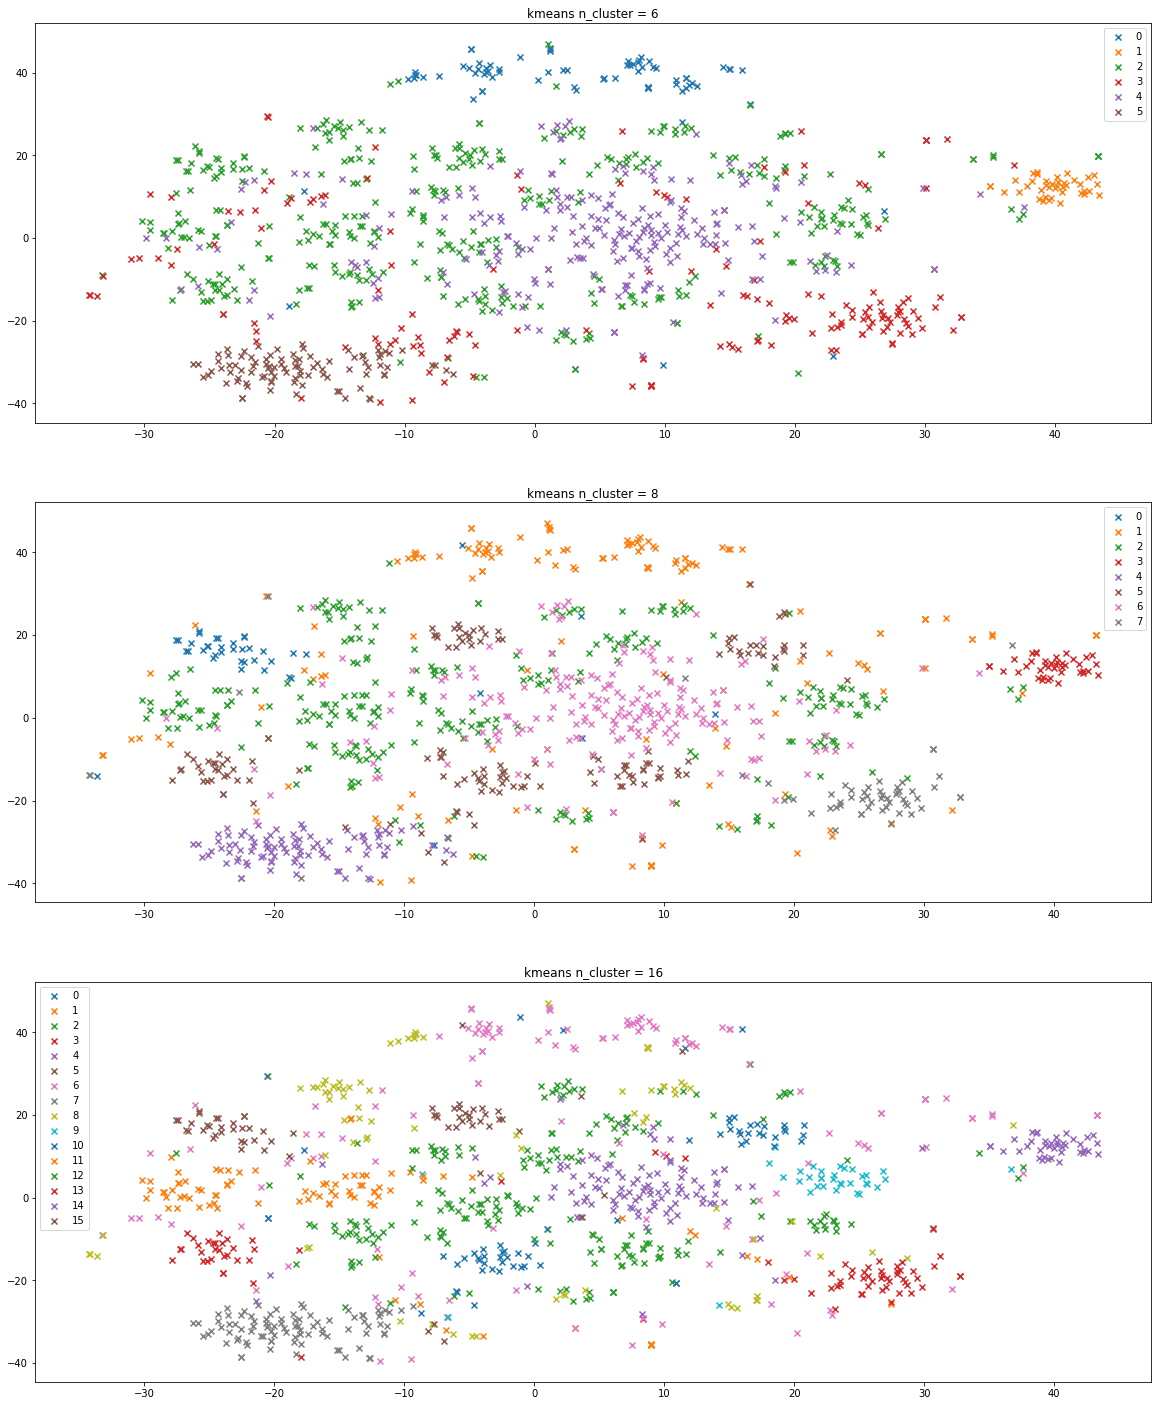

In [47]:
nrows, ncols = 3, 1
fig, axs = plt.subplots(nrows, ncols, figsize=(20,25))

kmeans_list = [kmeans_n6, kmeans_n8, kmeans_n16]

for kmeans, ax in zip(kmeans_list, axs):
#     print(kmeans, ax)
    label = [i for i in range(kmeans.n_clusters)]
#     print(label)
    for color in range(len(label)):
        x = []
        y = []
#         print(len(kmeans.labels_))
        for i in range(len(kmeans.labels_)):
            if kmeans.labels_[i] == color:
                x.append(decomposition_data[i][0])
                y.append(decomposition_data[i][1])

        ax.scatter(x, y, label=color, marker="x")

    ax.title.set_text(f'kmeans n_cluster = {kmeans.n_clusters}')
    ax.legend()
        # plt.xticks(())
        # plt.yticks(())

plt.savefig('./kmeans_1000p_diff_clusters.png', aspect=1)

In [48]:
print("random sample of name_id in each cluster(total 16 clusters)")
assigned_cluster = kmeans_n16.transform(X_16).argmin(axis=1)

for i in range(kmeans_n16.n_clusters):
    cluster = np.arange(0, X_16.shape[0])[assigned_cluster==i]
    sample_name_id = np.random.choice(cluster, 5, replace=False)
    print("cluster %d:" % i)
    for name_id in sample_name_id:
        actor_name_id = df_1000p.loc[name_id]['actor_id']
        name = df_1000p.loc[name_id]['actor_name']

        print( "       {}, {}. ".format(actor_name_id, name) )

random sample of name_id in each cluster(total 16 clusters)
cluster 0:
       nm1269983, Krysten Ritter. 
       nm0869871, Russell Tovey. 
       nm1395602, Allen Leech. 
       nm1421588, Nicole Richie. 
       nm1340638, Ricky Whittle. 
cluster 1:
       nm1970465, Kristofer Hivju. 
       nm0776040, Amanda Schull. 
       nm3004647, Brian Williams. 
       nm0290556, James Franco. 
       nm0058581, Justin Bartha. 
cluster 2:
       nm1678720, Matt Dallas. 
       nm0005169, Natasha Lyonne. 
       nm2569832, Camilla Luddington. 
       nm1982510, Jenna Coleman. 
       nm0199215, Hugh Dancy. 
cluster 3:
       nm0108758, Jordan Bridges. 
       nm1256270, Joe Francis. 
       nm0592993, Jimi Mistry. 
       nm0890055, Indira Varma. 
       nm0001760, Tori Spelling. 
cluster 4:
       nm1480443, Michael Scott. 
       nm0036571, Monica. 
       nm0369895, Havoc. 
       nm1635185, Michael Walker. 
       nm0839342, Sunny. 
cluster 5:
       nm0648153, Ty Olsson. 
       nm3023097, 